# London Housing and Population Analysis (2002 - 2015 data)

## 3. EDA Level == 'London Borough'

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [14]:
borough_view = pd.read_csv('C:/Users/csmyth/Desktop/Code/london_housing_eda/borough_dataset.csv')

# Confirm data set structure:
borough_view.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9867 entries, 0 to 9866
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9867 non-null   object 
 1   area           9867 non-null   object 
 2   average_price  9867 non-null   int64  
 3   houses_sold    9867 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 308.5+ KB


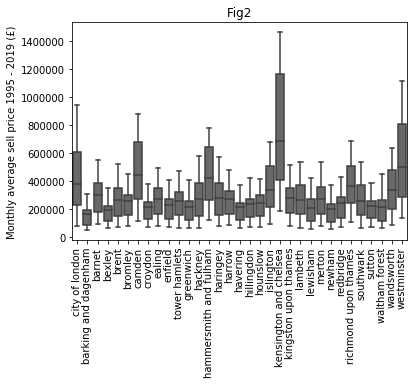

In [15]:
borough_names = borough_view['area'].unique().tolist()
borough_view = borough_view.rename(columns={'area': 'borough'})
borough_view['date'] = pd.to_datetime(borough_view['date'])

# Compare boroughs:

# 1. Show how monthly sell price varies per borough:
plt.figure()
boxes = sns.boxplot(x='borough', y='average_price', data=borough_view, color='dimgrey', )
boxes.set_xticklabels(borough_names, rotation=90)
boxes.set_title('Fig2')
boxes.set_xlabel('')
boxes.set_ylabel('Monthly average sell price 1995 - 2019 (£)')

plt.show()
# plt.savefig('Fig2_borough_sell_prices_boxplot.png')

Kensington and Chelsea, Westminster, City of London, Camden, Hammersmith and Fulham have the biggest ranges in price.  
The majority of other boroughs noticeably have their third quartile close to the median, suggesting their prices are closely grouped slightly above median.

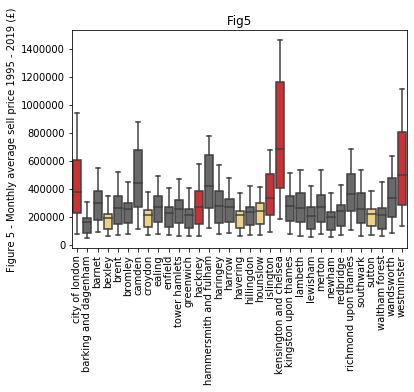

In [16]:
# 1b. This is a later revision/additional after I established focus boroughs in EDA 8.
steeps = ['westminster', 'kensington and chelsea', 'city of london', 'hackney', 'islington']
slights = ['hounslow', 'bexley', 'sutton', 'havering', 'croydon']

""" Use Colorbrewer to highlight focus boroughs """
pal = {borough: "#e31a1c" if borough in steeps else "#fed976" if borough in slights else "dimgrey" for borough in borough_names}

boxes2 = sns.boxplot(x='borough', y='average_price', data=borough_view, palette=pal)
boxes2.set_xticklabels(borough_names, rotation=90)
boxes2.set_xlabel('')
boxes2.set_title('Fig5')
boxes2.set_ylabel('Figure 5 - Monthly average sell price 1995 - 2019 (£)')

plt.show()
# plt.savefig('Fig5_borough_sell_prices_boxplot(2).png')

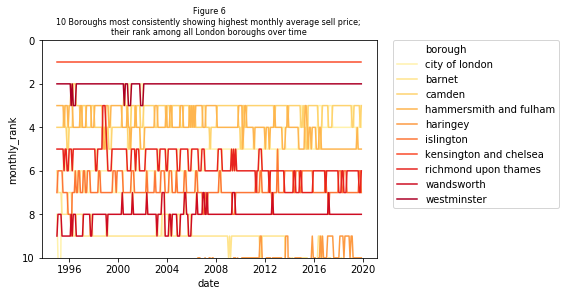

In [17]:
# 2. Rank boroughs by average sell price:

##  Simple Mean:
mean_borough_price = borough_view.groupby('borough')['average_price'].mean().astype('int64').sort_values(ascending=False)
mean_borough_price.to_markdown()

### Consistent rank:
borough_view['monthly_rank'] = borough_view.groupby(['date'])['average_price'].rank(ascending=False).astype('int64')

### Top 10 most consistently among the most expensive boroughs each month:
top_10 = borough_view.groupby(['borough'])['monthly_rank'].sum().sort_values(ascending=True).head(10).reset_index()
expensive_boroughs = top_10['borough'].tolist()
top_10_prices = borough_view.loc[borough_view['borough'].isin(expensive_boroughs)]

fig, ax = plt.subplots()
ax = sns.lineplot(data=top_10_prices, x='date', y='monthly_rank', hue='borough', palette='YlOrRd')
ax.invert_yaxis()
ax.set_ylim(10, 0)
plt.title('''Figure 6
10 Boroughs most consistently showing highest monthly average sell price; 
their rank among all London boroughs over time''', fontsize=8)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
# plt.savefig("Fig6_top_10_expensive_boroughs_ranked.png")

Kensington and Chelsea and Westminster are consistently the most expensive, despite outliers and large IQRs in their prices.   
Haringey only enters the Top 10 consistently after 2000.  
The City of London shows the biggest rise in the rankings, starting low.  
Barnet shows the opposite, dropping out of Top 10.  